In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from scipy.ndimage import measurements

In [3]:
def rand_lattice(L: int=20, p: float=0.5):
    """
    It creates a random lattice (matrix of booleans) with size L by L.
    The elements are True with probability (p) and False with probability (q=1-p).
    """


    return np.random.rand(L,L) <= p


def is_percolating(L_by_L):
    """
    checks the percolation of a lattice
    """


    labeled_lattice, num_clusters = measurements.label(L_by_L)
    if np.size(np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0])) == 0:
        return 0
    else:
        return 1

$\Large L \ = \ 10$

In [4]:
probabilities = np.arange(0, 1.05, step=0.05)
# We are going to average over 100 samples for each probability.
Qinfs = np.zeros((100, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(100):
        # Create a lattice:
        lattice = rand_lattice(L=10, p=probabilities[j])
        # Find the probability of a random turned-on site to be attached to a spanning cluster:
        # if is_percolating(lattice):
        labeled_lattice, *rest = measurements.label(lattice)
        # We need to acount for division by zero:
        if np.sum(labeled_lattice[labeled_lattice>0]):
            Qinfs[i, j] = np.sum(labeled_lattice[labeled_lattice==np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0])[:]]) / np.sum(labeled_lattice[labeled_lattice>0])
        else:
            Qinfs[i, j] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_2752\66301723.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  Qinfs[i, j] = np.sum(labeled_lattice[labeled_lattice==np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0])[:]]) / np.sum(labeled_lattice[labeled_lattice>0])


In [5]:
Qinf10 = np.mean(Qinfs, axis=0)

$\Large L \ = \ 100$

In [6]:
probabilities = np.arange(0, 1.05, step=0.05)
Qinfs = np.zeros((100, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(100):
        # Create a lattice:
        lattice = rand_lattice(L=100, p=probabilities[j])
        # Find the probability of a random turned-on site to be attached to a spanning cluster:
        # if is_percolating(lattice):
        labeled_lattice, *rest = measurements.label(lattice)
        # We need to acount for division by zero:
        if np.sum(labeled_lattice[labeled_lattice>0]):
            Qinfs[i, j] = np.sum(labeled_lattice[labeled_lattice==np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0])[:]]) / np.sum(labeled_lattice[labeled_lattice>0])
        else:
            Qinfs[i, j] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_2752\3806261857.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  Qinfs[i, j] = np.sum(labeled_lattice[labeled_lattice==np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0])[:]]) / np.sum(labeled_lattice[labeled_lattice>0])


In [7]:
Qinf100 = np.mean(Qinfs, axis=0)

$\Large L \ = \ 200$

In [8]:
probabilities = np.arange(0, 1.05, step=0.05)
Qinfs = np.zeros((100, len(probabilities)))

for j in range(len(probabilities)):
    for i in range(100):
        # Create a lattice:
        lattice = rand_lattice(L=200, p=probabilities[j])
        # Find the probability of a random turned-on site to be attached to a spanning cluster:
        # if is_percolating(lattice):
        labeled_lattice, *rest = measurements.label(lattice)
        # We need to acount for division by zero:
        if np.sum(labeled_lattice[labeled_lattice>0]):
            Qinfs[i, j] = np.sum(labeled_lattice[labeled_lattice==np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0])[:]]) / np.sum(labeled_lattice[labeled_lattice>0])
        else:
            Qinfs[i, j] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_2752\2342901518.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  Qinfs[i, j] = np.sum(labeled_lattice[labeled_lattice==np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0])[:]]) / np.sum(labeled_lattice[labeled_lattice>0])


In [9]:
Qinf200 = np.mean(Qinfs, axis=0)

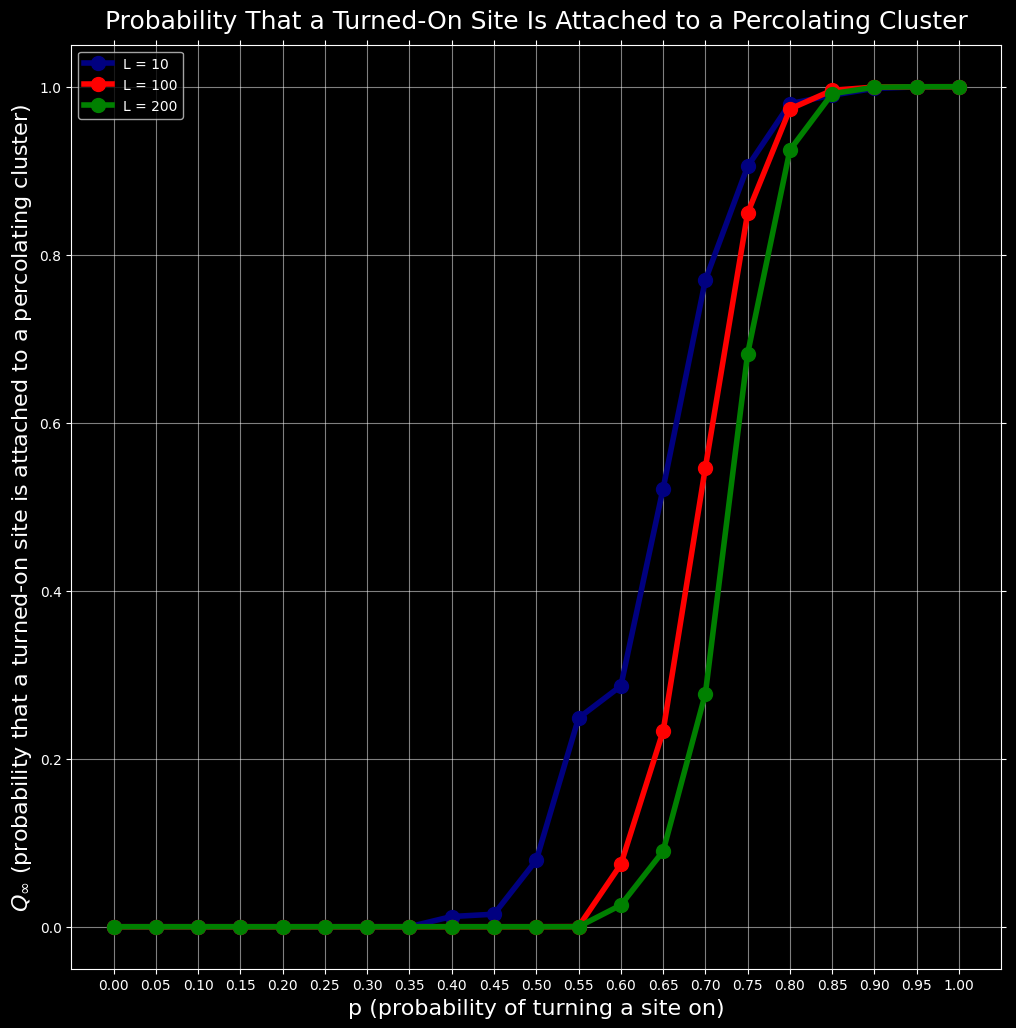

In [11]:
fig, ax = plt.subplots(figsize=(12,12))
ax.clear()
ax.plot(probabilities, Qinf10, label="L = 10", linewidth=4, color="navy", marker="o", ms=10)
ax.plot(probabilities, Qinf100, label="L = 100", linewidth=4, color="r", marker="o", ms=10)
ax.plot(probabilities, Qinf200, label="L = 200", linewidth=4, color="g", marker="o", ms=10)
ax.set_title("Probability That a Turned-On Site Is Attached to a Percolating Cluster", fontsize=18, pad=12)
ax.set_xlabel("p (probability of turning a site on)", fontsize=16)
ax.set_ylabel("$Q_{\infty}$ (probability that a turned-on site is attached to a percolating cluster)", fontsize=16)
ax.set_xticks(probabilities)
ax.grid(alpha=0.5)
ax.legend();

In [12]:
fig.savefig("Plot4_4.jpg")